In [4]:
from astropy.io import fits
import numpy as np
from IPython.display import HTML

data = fits.open('../photoParallax/photoParallaxAnderson17Mini.fits')
train = data[1].data
test = np.load('dusttgas.npy')

In [6]:
train.dtype.names

('tycho2_id',
 'source_id',
 'ra',
 'dec',
 'J_Ks',
 'M_J',
 'E(B_V)',
 'parallax_expectation_value',
 'parallax_variance',
 'l',
 'b')

In [10]:
testColor = test[0]

In [11]:
testEBV = test[1]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
absMag = train['M_J']
color = train['J_Ks']

colorMid = 0.625
colorDel = 0.15
colorMin = colorMid - colorDel
colorMax = colorMid + colorDel
absMagMid = -1.0
absMagDel = 0.5
absMagMin = absMagMid - absMagDel
absMagMax = absMagMid + absMagDel


redclump = (color < colorMax) & (color > colorMin) & (absMag < absMagMax) & (absMag > absMagMin)

rgb = (color > 0.5) & (absMag < 3.)
lms = (color > 0.5) & (absMag > 3.)
ums = (color < 0.5)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


In [25]:
c1 = '#a6cee3'
c2 = '#1f78b4'
c3 = '#b2df8a'
c4 = '#33a02c'

In [59]:
HTML('<img src="playwithdata.png">')

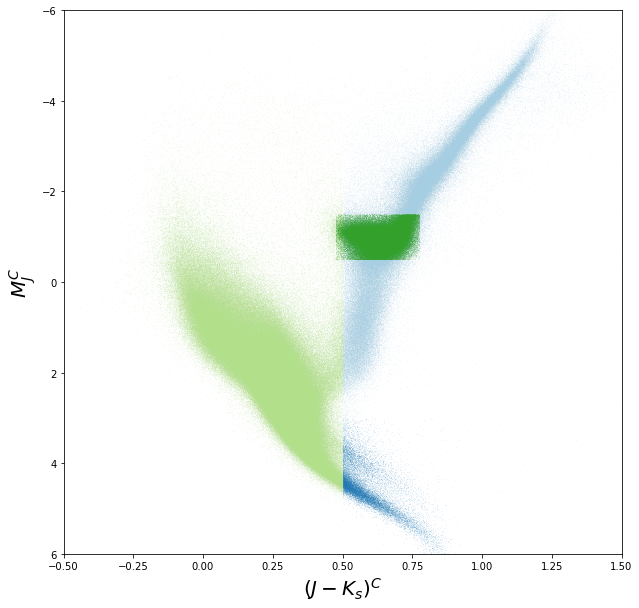

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(color[rgb], absMag[rgb], s=1, lw=0, c=c1, alpha=0.1, zorder=0, rasterized=True)
plt.scatter(color[lms], absMag[lms], s=1, lw=0, c=c2, alpha=0.1, zorder=1, rasterized=True)
plt.scatter(color[ums], absMag[ums], s=1, lw=0, c=c3, alpha=0.1, zorder=2, rasterized=True)
plt.scatter(color[redclump], absMag[redclump], s=1, lw=0, c=c4, alpha=0.1, zorder=3, rasterized=True)

#plt.scatter(train['J_Ks'], train['M_J'], s=0.1, alpha=0.01, rasterized=True)
plt.ylim(6, -6)
plt.xlim(-0.5, 1.5)
plt.xlabel(r'$(J-K_s)^C$', fontsize=20)
plt.ylabel(r'$M_J^C$', fontsize=20)

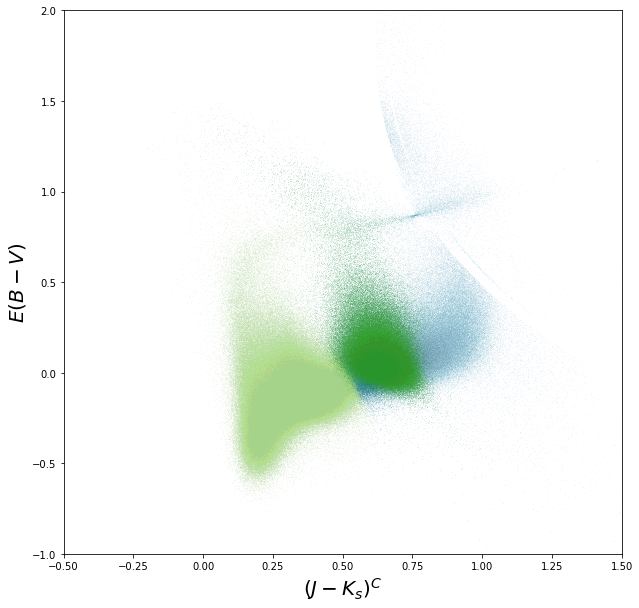

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(testColor[rgb], testEBV[rgb], s=1, lw=0, c=c1, alpha=0.1, zorder=0, rasterized=True)
plt.scatter(testColor[lms], testEBV[lms], s=1, lw=0, c=c2, alpha=0.1, zorder=1, rasterized=True)
plt.scatter(testColor[ums], testEBV[ums], s=1, lw=0, c=c3, alpha=0.1, zorder=2, rasterized=True)
plt.scatter(testColor[redclump], testEBV[redclump], s=1, lw=0, c=c4, alpha=0.1, zorder=3, rasterized=True)

#plt.scatter(train['J_Ks'], train['M_J'], s=0.1, alpha=0.01, rasterized=True)
plt.ylim(-1, 2)
plt.xlim(-0.5, 1.5)
plt.xlabel(r'$(J-K_s)^C$', fontsize=20)
plt.ylabel(r'$E(B-V)$', fontsize=20)
plt.scatter(testColor, testEBV, s=0.1, alpha=0.01, rasterized=True)

In [51]:
n_frames = 30
n_points = len(color)
%matplotlib osx
frames = np.zeros((2,n_points,n_frames))
fig = plt.figure(figsize=(10,10))
#random start and end points to test 
firstx = color
firsty = absMag/-2.5
lastx = testColor
lasty = testEBV

for i in range(n_points):
    frames[0,i,:] = np.linspace(firstx[i],lastx[i],n_frames)
    frames[1,i,:] = np.linspace(firsty[i],lasty[i],n_frames)

#make intermediate date points, slow
#frames[0,:,i] = np.linspace(firstx[i],lastx[i],n_frames)
#frames[1,:,i] = np.linspace(firsty[i],lasty[i],n_frames)

#make frames  
for i in range(n_frames):
    fig.clf()
    #plt.figure(figsize=(10,10))
    plt.scatter(frames[0,:,i][rgb], frames[1,:,i][rgb], s=1, lw=0, c=c1, alpha=0.1, zorder=0, rasterized=True)
    plt.scatter(frames[0,:,i][lms], frames[1,:,i][lms], s=1, lw=0, c=c2, alpha=0.1, zorder=1, rasterized=True)
    plt.scatter(frames[0,:,i][ums], frames[1,:,i][ums], s=1, lw=0, c=c3, alpha=0.1, zorder=2, rasterized=True)
    plt.scatter(frames[0,:,i][redclump], frames[1,:,i][redclump], s=1, lw=0, c=c4, alpha=0.1, zorder=3, rasterized=True)

    if i < n_frames/2.: 
        ylabel=r'$M_J^c$'
        xlabel=r'$(J-K_s)^c$'
    else:
        ylabel = r'$E(B-V)$'
        xlabel = r'$(J-K_s)^c_P$'
    #plt.scatter(frames[0,:,i],frames[1,:,i],s=1, lw=0, c=c3, alpha=0.1, zorder=2, rasterized=True)
    #plt.ylim(6, -6)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlim(-0.5, 1.5)
    fig.savefig('mlInterp_{0:03d}.png'.format(i))

//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [57]:
import imageio
import numpy as np

images = []
#frames = np.arange(0,30)
frames = np.concatenate((np.arange(0, 30), np.zeros(30) + 29))
#addframes = np.zeros(100) + 29

for i in list(frames):
    filename = 'mlInterp_{0}.png'.format('%03d' % i)
    images.append(imageio.imread(filename))
imageio.mimsave('mlInterp.gif', images)


In [58]:
HTML('<img src="mlInterp.gif">')